This task involves performing exploratory data
analysis on a dataset



Responsibility:
Create visualizations to understand the
distribution of variables, identify outliers, and
check for correlations between variables.

In [36]:
import pandas as pd # library to load the dataset
import matplotlib.pyplot as plt # library is for visualization
import seaborn as sns #  library is also for visualization


In [25]:
# loading the data set
df = pd.read_csv('/content/usvedios.csv');

Data cleaning

In [26]:
# checking the data that is there in the dataset
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [27]:
# listing out the sum of null values in the dataset
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [28]:
# droping the null values from the description columns as there are 570 null values
df.dropna(subset=['description'], inplace=True)

In [29]:
# again checking the sum of the null values
#all the null values in the description column are removed
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [30]:
# droping duplicate id's
df.drop_duplicates(subset=['video_id'], inplace=True)


In [31]:
# Clean up special characters in tags
df['tags'] = df['tags'].str.replace('[^a-zA-Z0-9| ]', '', regex=True)


In [32]:
# Drop unnecessary columns
df.drop(columns=['thumbnail_link'], inplace=True)

In [33]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6254 entries, 0 to 40766
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                6254 non-null   object
 1   trending_date           6254 non-null   object
 2   title                   6254 non-null   object
 3   channel_title           6254 non-null   object
 4   category_id             6254 non-null   int64 
 5   publish_time            6254 non-null   object
 6   tags                    6254 non-null   object
 7   views                   6254 non-null   int64 
 8   likes                   6254 non-null   int64 
 9   dislikes                6254 non-null   int64 
 10  comment_count           6254 non-null   int64 
 11  comments_disabled       6254 non-null   bool  
 12  ratings_disabled        6254 non-null   bool  
 13  video_error_or_removed  6254 non-null   bool  
 14  description             6254 non-null   object
dtypes: bool(

statistics summary

In [34]:
print(df.describe())

       category_id         views         likes       dislikes  comment_count
count  6254.000000  6.254000e+03  6.254000e+03    6254.000000    6254.000000
mean     20.423089  7.636408e+05  3.473997e+04    1342.370963    4430.573553
std       7.237738  1.934056e+06  1.165373e+05    9225.500426   19548.795075
min       1.000000  5.490000e+02  0.000000e+00       0.000000       0.000000
25%      17.000000  8.653475e+04  2.031750e+03      74.000000     270.000000
50%      24.000000  2.779080e+05  8.203000e+03     245.000000     940.500000
75%      25.000000  7.620472e+05  2.547275e+04     773.750000    2876.250000
max      43.000000  4.843165e+07  3.880071e+06  483924.000000  692305.000000


visualization

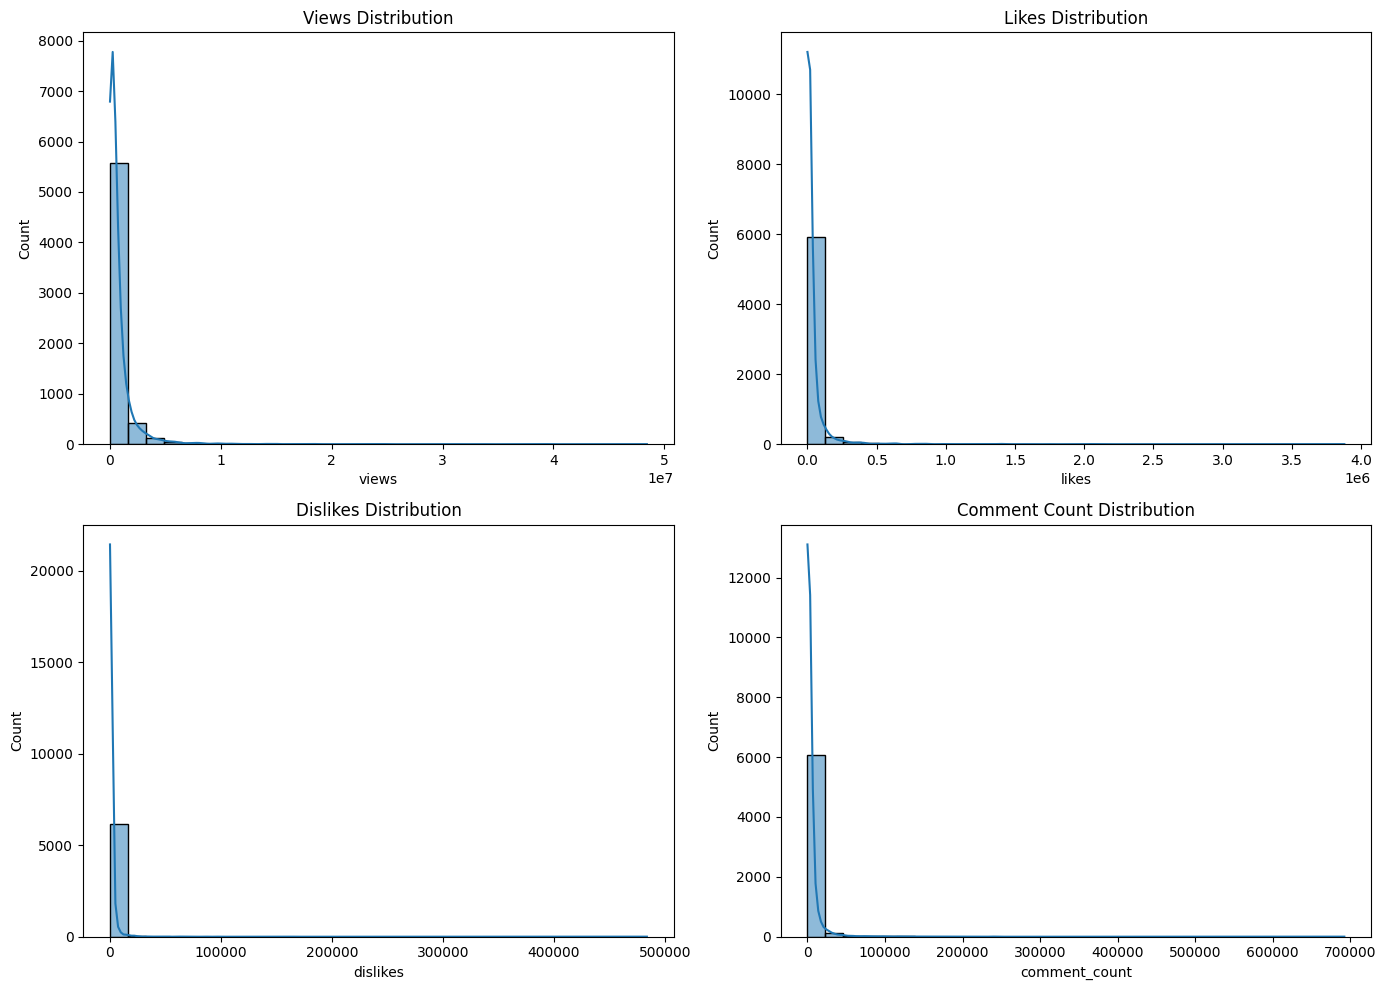

In [37]:
# Distribution of Views, Likes, Dislikes, and Comment Count
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['views'], bins=30, kde=True, ax=axes[0, 0]).set(title='Views Distribution')
sns.histplot(df['likes'], bins=30, kde=True, ax=axes[0, 1]).set(title='Likes Distribution')
sns.histplot(df['dislikes'], bins=30, kde=True, ax=axes[1, 0]).set(title='Dislikes Distribution')
sns.histplot(df['comment_count'], bins=30, kde=True, ax=axes[1, 1]).set(title='Comment Count Distribution')
plt.tight_layout()
plt.show()


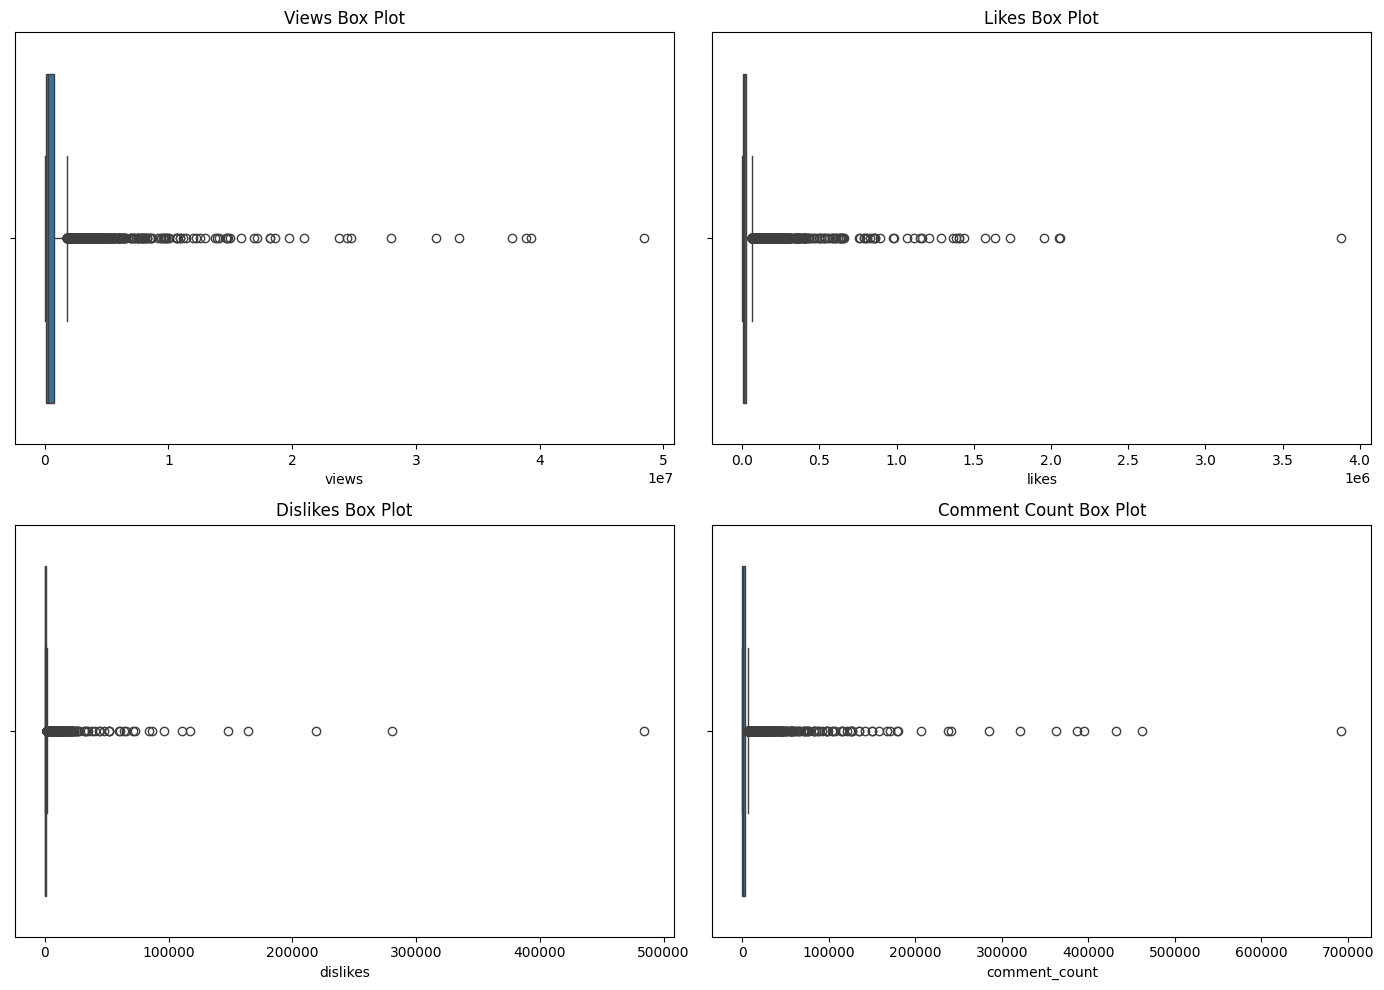

In [38]:
# 4. Identifying Outliers using Box Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x=df['views'], ax=axes[0, 0]).set(title='Views Box Plot')
sns.boxplot(x=df['likes'], ax=axes[0, 1]).set(title='Likes Box Plot')
sns.boxplot(x=df['dislikes'], ax=axes[1, 0]).set(title='Dislikes Box Plot')
sns.boxplot(x=df['comment_count'], ax=axes[1, 1]).set(title='Comment Count Box Plot')
plt.tight_layout()
plt.show()

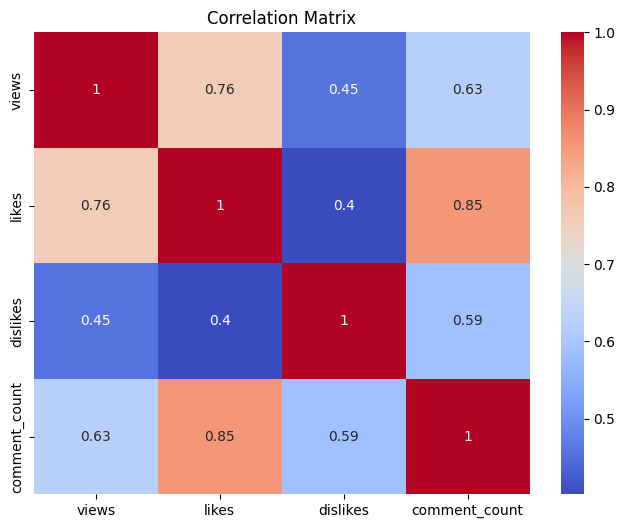

In [39]:
# 5. Correlations between Variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


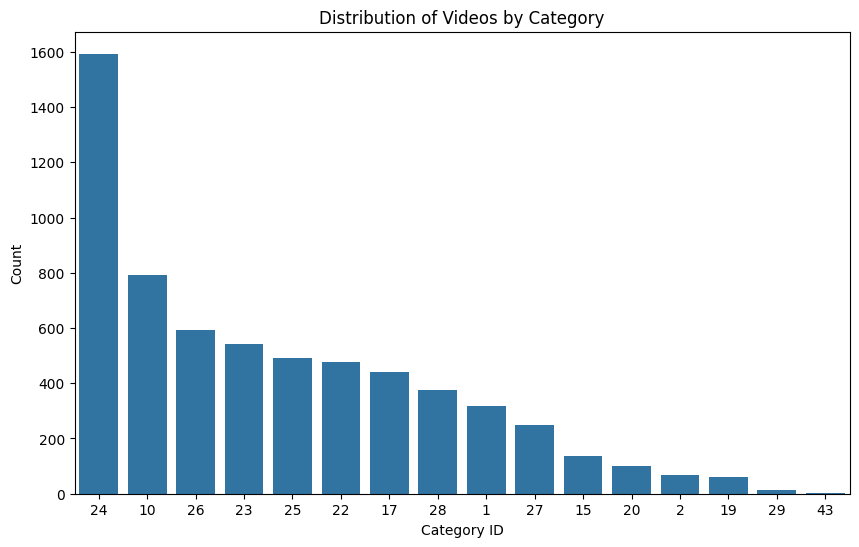

In [40]:
# 6. Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category_id', data=df, order=df['category_id'].value_counts().index)
plt.title("Distribution of Videos by Category")
plt.xlabel("Category ID")
plt.ylabel("Count")
plt.show()


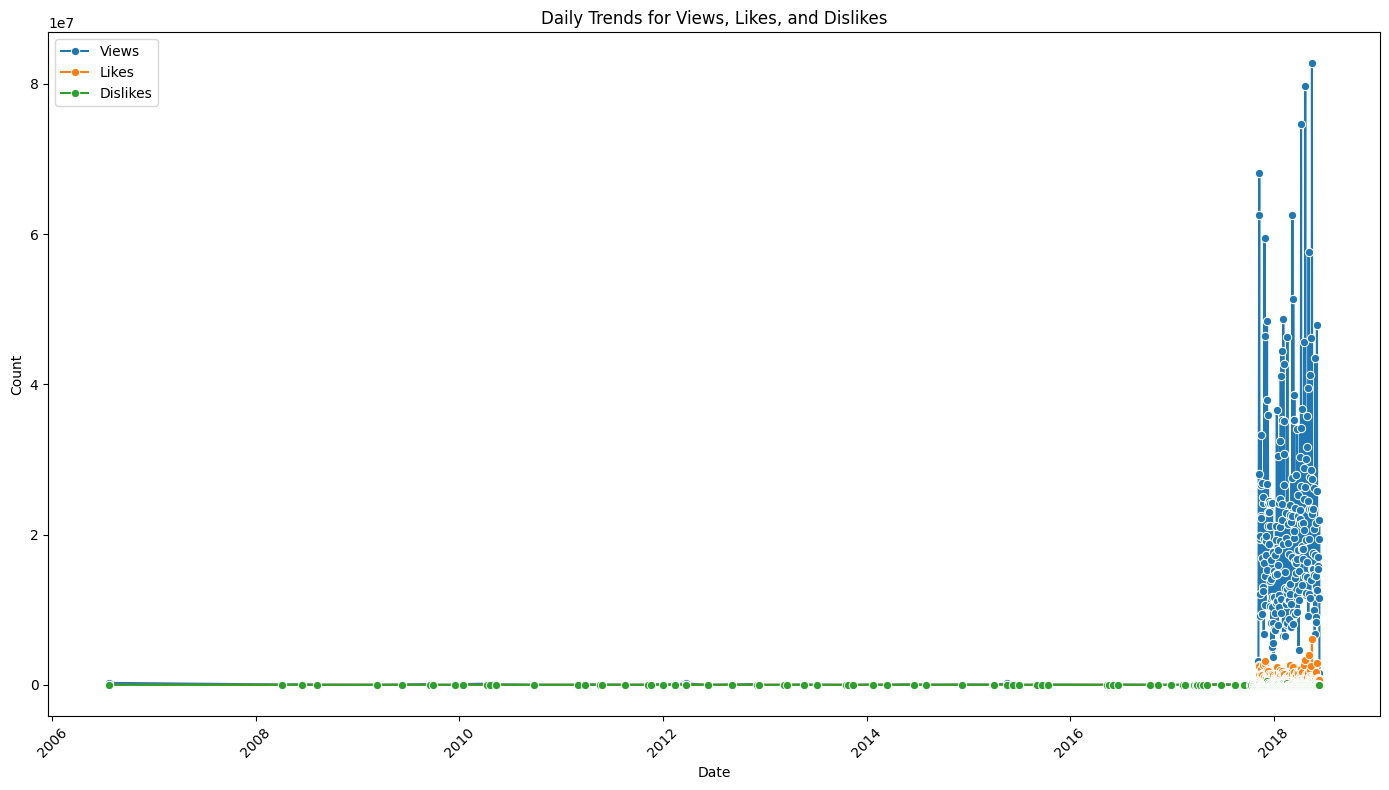

In [44]:
df['publish_time'] = pd.to_datetime(df['publish_time'])  # Convert to datetime if not already

# Extract the date for aggregation
df['publish_date'] = df['publish_time'].dt.date  # Extract date

# Group by publish_date and sum views, likes, and dislikes
daily_trends = df.groupby('publish_date')[['views', 'likes', 'dislikes']].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_trends, x='publish_date', y='views', label='Views', marker='o')
sns.lineplot(data=daily_trends, x='publish_date', y='likes', label='Likes', marker='o')
sns.lineplot(data=daily_trends, x='publish_date', y='dislikes', label='Dislikes', marker='o')

plt.title("Daily Trends for Views, Likes, and Dislikes")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend for clarity
plt.tight_layout()  # Adjust layout
plt.show()